In [2]:
import numpy as np
import cv2
import skimage.morphology as morp
import matplotlib.pyplot as plt

#import skimage
from skimage import data, exposure, img_as_float32
from skimage.util import img_as_ubyte
from skimage.filters import rank
from skimage.exposure import match_histograms

from my import cv2_imshow

DAMA_JPG = 'img/Dama.jpg'
LOW_JPG = 'img/low.jpg'


### Transform 1

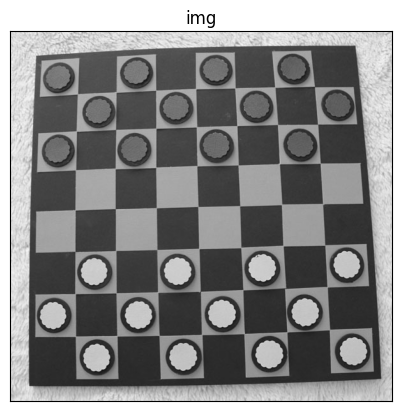

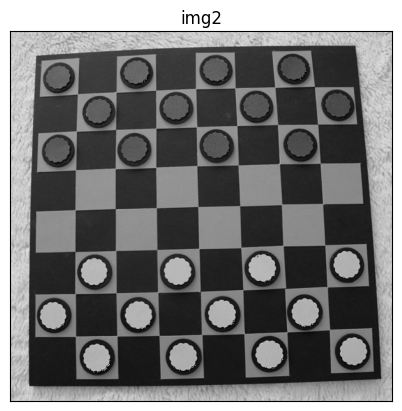

In [3]:
img = cv2.imread(DAMA_JPG, 0)
img2 = img-20

cv2_imshow('img', img)
cv2_imshow('img2', img2)


# plt.subplot(121),plt.imshow(img),plt.title('Input Image')
# plt.subplot(122),plt.imshow(img2),plt.title('Output Image')

### Transform 2

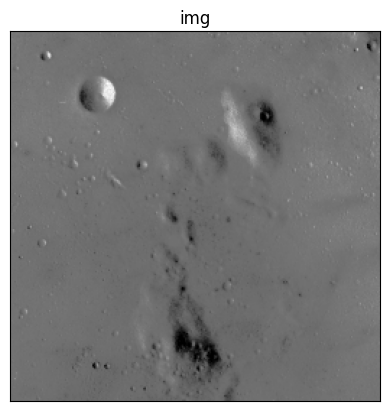

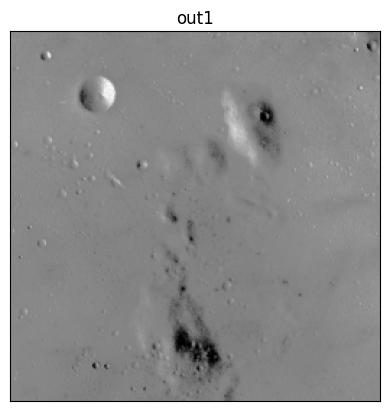

In [4]:
# img_as_float float64 tipiyle çalışıyor, bu da plt.imshow'da sorun çıkarıyor.
img = img_as_float32(data.moon())

sigmo_adjust=exposure.adjust_log(img,gain=1,inv=False)

cv2_imshow('img', img)
cv2_imshow('out1', sigmo_adjust)

#import math
#sigmo_img = np.zeros((img.shape[0],img.shape[1]),dtype = 'float32')
#minmax_img = np.zeros((img.shape[0],img.shape[1]),dtype = 'float32')
## Loop over the image and apply Min-Max formulae
#for i in range(img.shape[0]):
#    for j in range(img.shape[1]):
#        minmax_img[i,j] = 255*(img[i,j]-np.min(img))/(np.max(img)-np.min(img))
#        sigmo_img[i,j] = (255/(1+math.exp(-10*(img[i,j]/255-0.5))))
#cv2_imshow('out2', sigmo_img)

### Transform 3

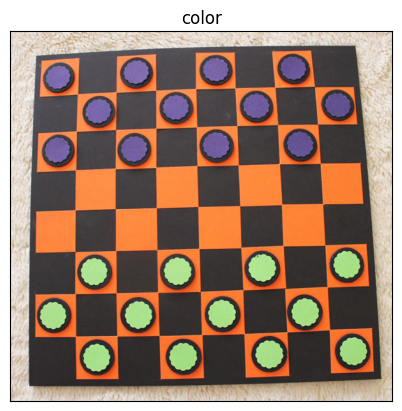

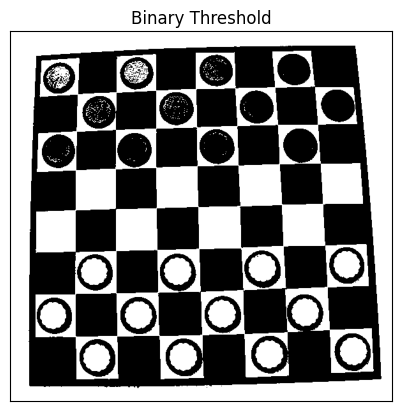

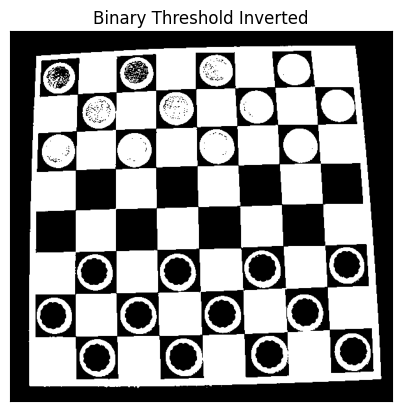

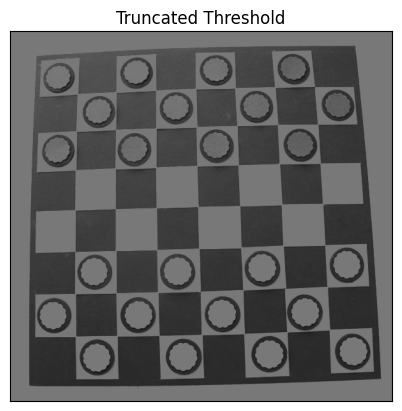

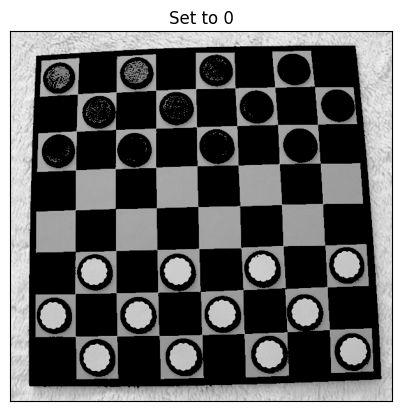

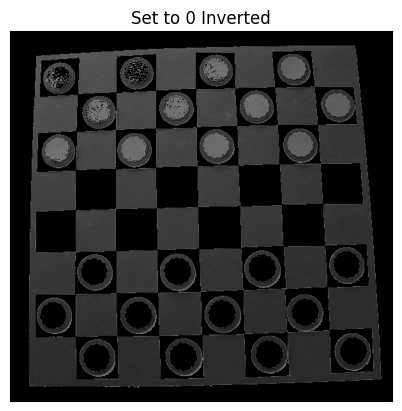

In [5]:

# path to input image is specified and 
# image is loaded with imread command
image1 = cv2.imread(DAMA_JPG, 1)
cv2_imshow('color', image1)
 
# cv2.cvtColor is applied over the
# image input with applied parameters
# to convert the image in grayscale
img = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)

# applying different thresholding
# techniques on the input image
# all pixels value above 120 will
# be set to 255
ret, thresh1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 120, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 120, 255, cv2.THRESH_TOZERO_INV)

# the window showing output images
# with the corresponding thresholding
# techniques applied to the input images
cv2_imshow('Binary Threshold', thresh1)
cv2_imshow('Binary Threshold Inverted', thresh2)
cv2_imshow('Truncated Threshold', thresh3)
cv2_imshow('Set to 0', thresh4)
cv2_imshow('Set to 0 Inverted', thresh5)


### Transform 4

#### Variant 1

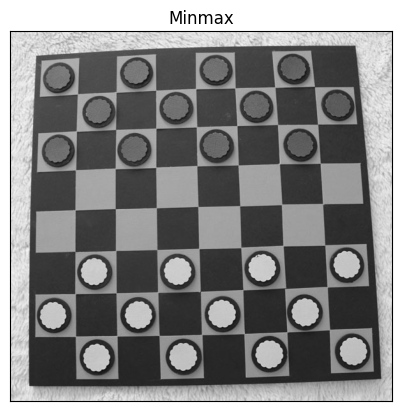

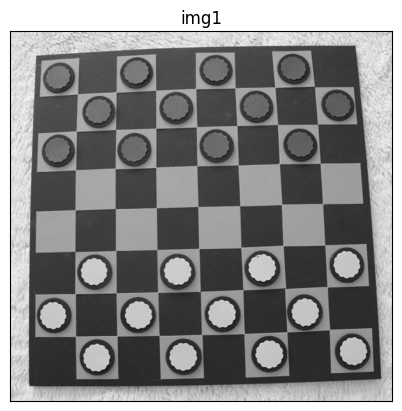

In [6]:

# Read the image
img1 = cv2.imread(DAMA_JPG, 0)

# Create zeros array to store the stretched image
minmax_img = np.zeros((img1.shape[0],img1.shape[1]),dtype = 'uint8')

# Loop over the image and apply Min-Max formulae
for i in range(img1.shape[0]):
    for j in range(img1.shape[1]):
        minmax_img[i,j] = 255*(img1[i,j]-np.min(img1))/(np.max(img1)-np.min(img1))

# Displat the stretched image
cv2_imshow('Minmax',minmax_img)
cv2_imshow('img1',img1)

#### Variant 2

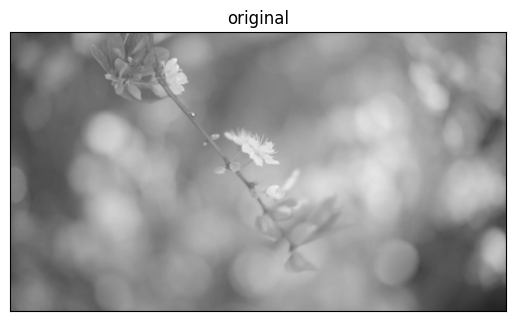

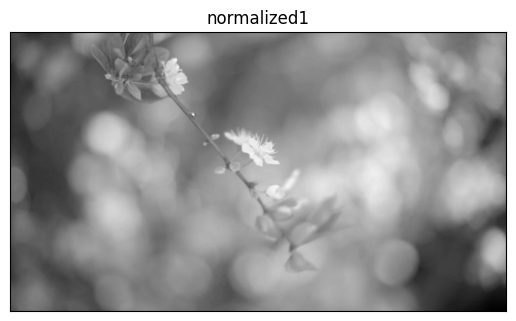

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


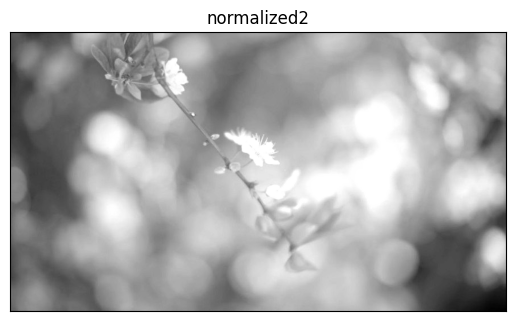

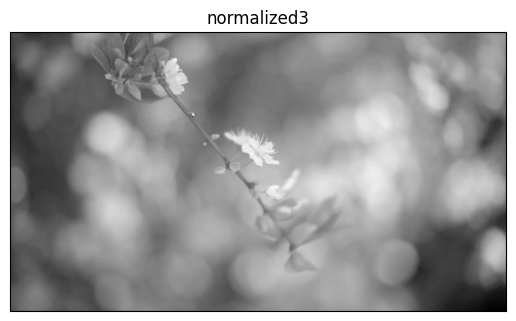

In [7]:
# Read the image
img = cv2.imread(LOW_JPG, 0)

# normalize float versions
norm_img1 = cv2.normalize(img, None, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)
norm_img2 = cv2.normalize(img, None, alpha=0, beta=1.2, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_32F)

norm = np.zeros((img.shape[0],img.shape[1]),dtype = 'uint8')
final = cv2.normalize(img,  norm, 0, 255, cv2.NORM_MINMAX)

# display input and both output images
cv2_imshow('original',img)
cv2_imshow('normalized1',norm_img1)
cv2_imshow('normalized2',norm_img2)
cv2_imshow('normalized3',final)


### Transform 5

#### Variant 1

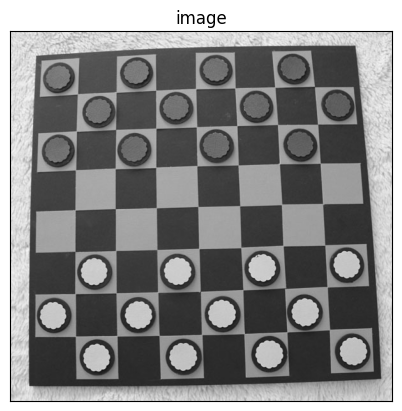

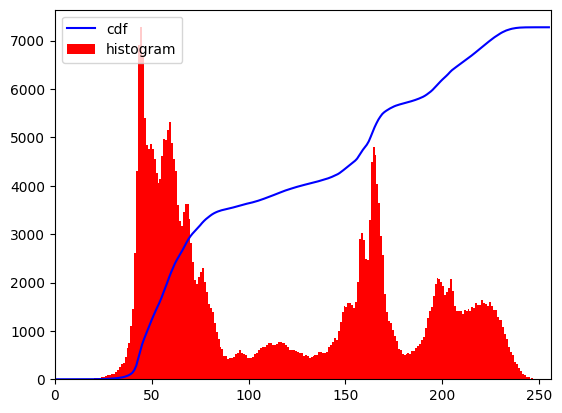

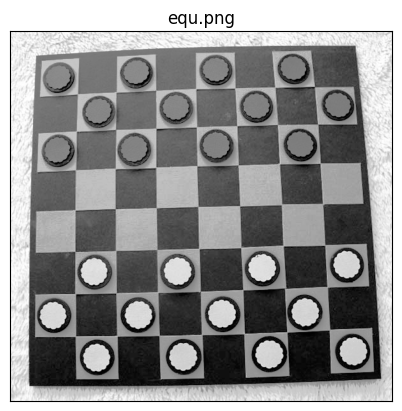

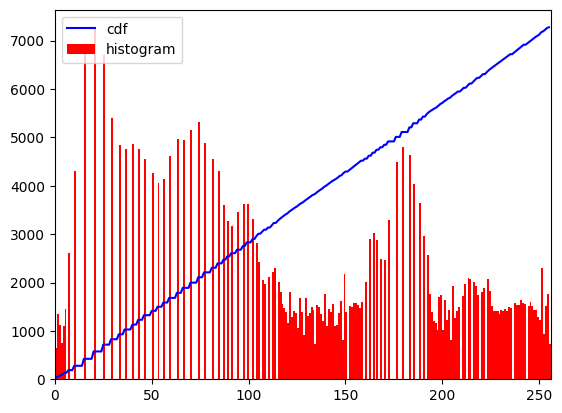

In [8]:
# Read the image
img = cv2.imread(DAMA_JPG, 0)

cv2_imshow('image',img)

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()


equ = cv2.equalizeHist(img)

cv2_imshow('equ.png',equ)

hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

#### Variant 2

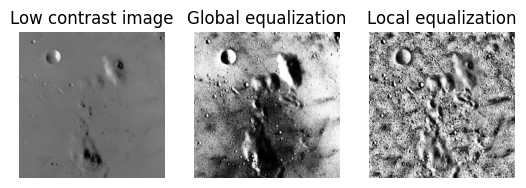

In [9]:
# Original image
img = img_as_ubyte(data.moon())

# Global equalize
img_global = exposure.equalize_hist(img)

# Local Equalization, disk shape kernel
# Better contrast with disk kernel but could be different
kernel = morp.disk(30)
img_local = rank.equalize(img, kernel)

fig, (ax_img, ax_global, ax_local) = plt.subplots(1, 3)

ax_img.imshow(img, cmap=plt.cm.gray)
ax_img.set_title('Low contrast image')
ax_img.set_axis_off()

ax_global.imshow(img_global, cmap=plt.cm.gray)
ax_global.set_title('Global equalization')
ax_global.set_axis_off()

ax_local.imshow(img_local, cmap=plt.cm.gray)
ax_local.set_title('Local equalization')
ax_local.set_axis_off()

plt.show()

### Transform 6

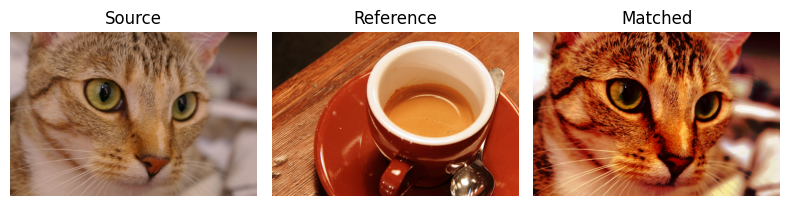

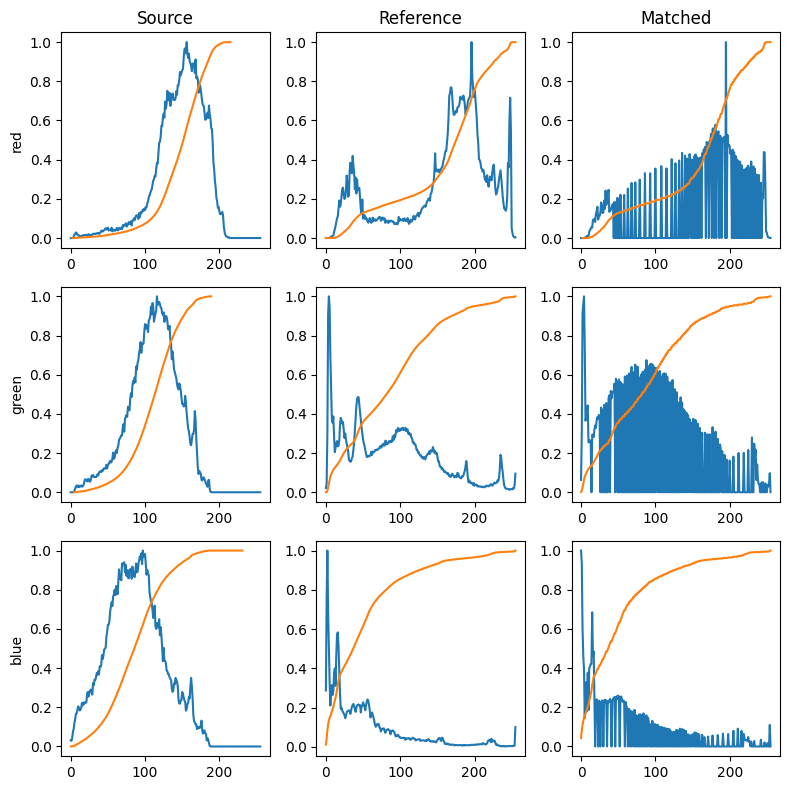

In [10]:
reference = data.coffee()
image = data.chelsea()

#multichannel parametresi kaldırılmış:
#https://github.com/scikit-image/scikit-image/issues/4294
matched = match_histograms(image, reference, channel_axis = 2)

fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(8, 3), sharex=True, sharey=True)
for aa in (ax1, ax2, ax3):
    aa.set_axis_off()

ax1.imshow(image)
ax1.set_title('Source')
ax2.imshow(reference)
ax2.set_title('Reference')
ax3.imshow(matched)
ax3.set_title('Matched')

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(8, 8))


for i, img in enumerate((image, reference, matched)):
    for c, c_color in enumerate(('red', 'green', 'blue')):
        img_hist, bins = exposure.histogram(img[..., c], source_range='dtype')
        axes[c, i].plot(bins, img_hist / img_hist.max())
        img_cdf, bins = exposure.cumulative_distribution(img[..., c])
        axes[c, i].plot(bins, img_cdf)
        axes[c, 0].set_ylabel(c_color)

axes[0, 0].set_title('Source')
axes[0, 1].set_title('Reference')
axes[0, 2].set_title('Matched')

plt.tight_layout()
plt.show()